<a href="https://colab.research.google.com/github/fiuzaaa/Analise--mercado/blob/master/TrendLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the entire repo.
import os
from getpass import getpass
user = 'fiuzaaa'
password = 'mathema10!'
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/fiuzaaa/Analise--mercado.git


%cd cloned-repo
!ls

fatal: destination path 'Analise--mercado' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'cloned-repo'
/content
Analise--mercado


In [2]:
import pandas as pd
from scipy.stats import linregress

In [3]:
data = pd.read_csv('Analise--mercado/Data/WIKI-AAPL.csv')
data.head()


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0
1,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
3,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
4,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0


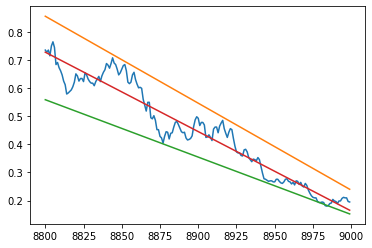

In [4]:
data0 = data.copy()
data0['date_id'] =  data0.index

data0 = data0[8800:9000]

# high trend line

data1 = data0

while len(data1)>5:

    reg = linregress(
                    x=data1['date_id'],
                    y=data1['Adj. High'],
                    )
    data1 = data1.loc[data1['Adj. High'] > reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['Adj. High'],
                    )

data0['high_trend'] = reg[0] * data0['date_id'] + reg[1]

# low trend line

data1 = data0

while len(data1)>5:

    reg = linregress(
                    x=data1['date_id'],
                    y=data1['Adj. Low'],
                    )
    data1 = data1.loc[data1['Adj. Low'] < reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['Adj. Low'],
                    )

data0['low_trend'] = reg[0] * data0['date_id'] + reg[1]

# trend line
data1 = data0
reg = linregress(x=data1['date_id'],
                 y=data1['Adj. Close']
                 )
data0['close_trend'] = reg[0] * data0['date_id'] + reg[1]

# plot

data0['Adj. Close'].plot();

#data['Adj. High'][8000::].plot();
#data['Adj. Low'][8000::].plot();

data0['high_trend'].plot();
data0['low_trend'].plot();
data0['close_trend'].plot();
